In [ ]:
#1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
X=housing.data
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
Y=housing.target
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
house_dataframe= pd.DataFrame(housing.data,columns=housing.feature_names)

In [7]:
#Print first 5 rows of our DataFrame
house_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
#Add the target(price) column to the DataFrame
house_dataframe['Price']=housing.target
house_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
house_dataframe.shape

(20640, 9)

In [10]:
house_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [11]:
#statistical measure of the dataset
house_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


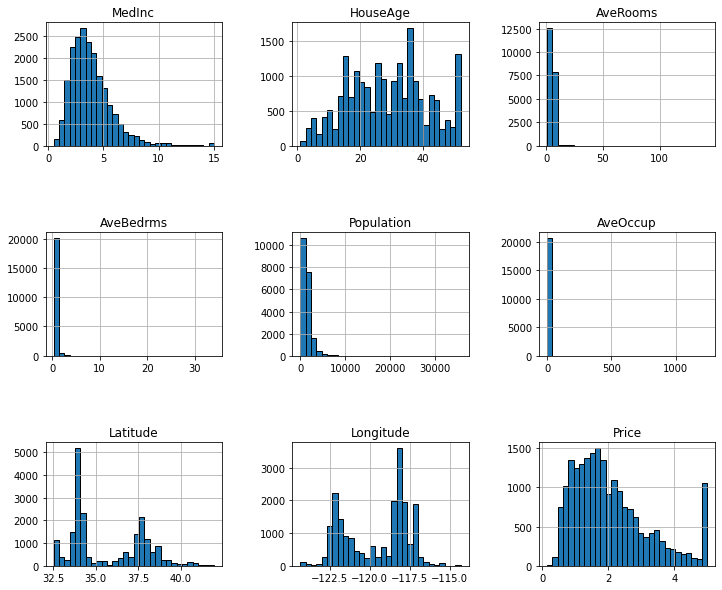

In [12]:
house_dataframe.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

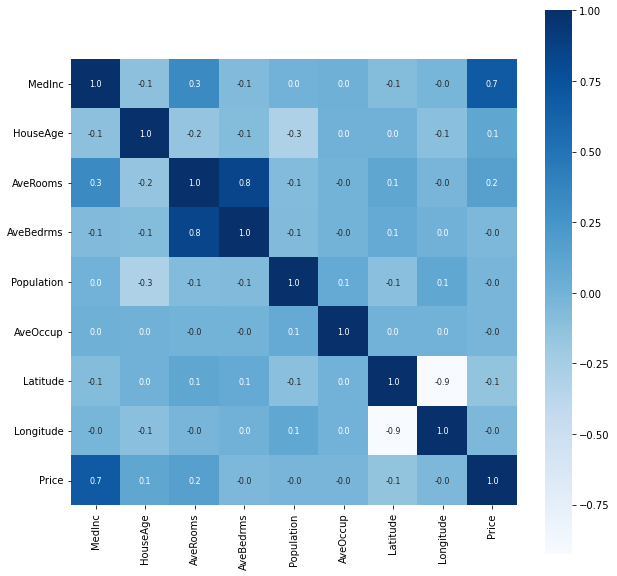

In [13]:
correlation=house_dataframe.corr()
#constructing heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Text(0.5, 1.0, 'Price value of the house depending of their spatial location')

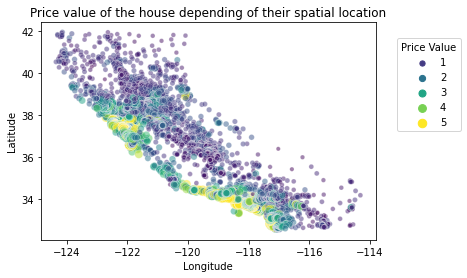

In [14]:
sns.scatterplot(data=house_dataframe, x="Longitude", y="Latitude",size="Price", hue="Price", palette="viridis", alpha=0.5)
plt.legend(title="Price Value", bbox_to_anchor=(1.05, 0.95),loc="upper left")
plt.title("Price value of the house depending of their spatial location")

In [15]:
#Split the data and target
X=house_dataframe.drop(['Price'],axis=1)
Y=house_dataframe['Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [32]:
#Training the Model using XGBoost Regressor
model=XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 10, alpha = 10, n_estimators = 100)
model.fit(X_train,Y_train)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=10,
             objective='reg:squarederror')

In [17]:
#Prediction on training model
training_predict=model.predict(X_train)
training_predict

array([0.55476457, 2.9319198 , 0.6645145 , ..., 1.8025488 , 1.9534256 ,
       0.72024727], dtype=float32)

In [18]:
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.9556665750486548

In [19]:
#R squared error
score1=metrics.r2_score(Y_train,training_predict)
#Mean Absolute error
score2=metrics.mean_absolute_error(Y_train,training_predict)
print("R squared error:",score1)
print("Mean Absolute error",score2)

R squared error: 0.9556665750486548
Mean Absolute error 0.17525966040948623


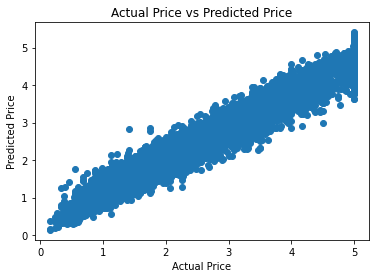

In [20]:
#Visualizing the actual and predicted prices
plt.scatter(Y_train,training_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [21]:
#Prediction on test data
test_predict=model.predict(X_test)
test_predict

array([2.8071456 , 1.7578356 , 0.90917534, ..., 1.5197586 , 0.76091576,
       2.082095  ], dtype=float32)

In [26]:
#R squared error
score3=metrics.r2_score(Y_test,test_predict)
#Mean Absolute error
score4=metrics.mean_absolute_error(Y_test,test_predict)
print("R squared error:",score3)
print("Mean Absolute error",score4)

R squared error: 0.7796256989874875
Mean Absolute error 0.37789626469110327


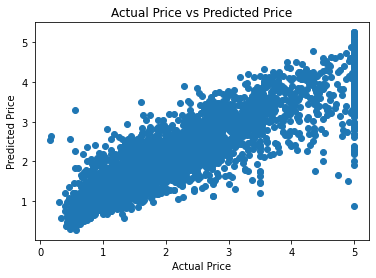

In [27]:
#Visualizing the actual and predicted prices
plt.scatter(Y_test,test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [28]:
x1=house_dataframe['AveRooms'].values.reshape(-1,1)
y1=house_dataframe['Price'].values.reshape(-1,1)
model.fit(x1,y1)
pre1=model.predict(x1)

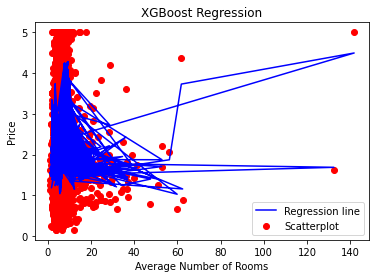

In [29]:
plt.scatter(x1,y1,color='red',label='Scatterplot')
plt.plot(x1,pre1,color='blue',label='Regression line')
plt.xlabel('Average Number of Rooms')
plt.title('XGBoost Regression')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
val=[[3,28,5,1,1425,3,35,-119]]
col=pd.DataFrame(val,columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup', 'Latitude', 'Longitude'])
col

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3,28,5,1,1425,3,35,-119


In [33]:
prediction=model.predict(col)
print(prediction)

[1.0425403]
